In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Generate synthetic data
num_samples = 1000
gender = np.random.choice(['M', 'F'], num_samples)
native = np.random.choice(['Y', 'N'], num_samples)
age = np.random.choice(['A', 'B'], num_samples)


df=pd.DataFrame(zip(gender,native,age))

df.columns=(['gender','native','age'])

['FNA', 'FNB', 'FYA', 'FYB', 'MNA', 'MNB', 'MYA', 'MYB']
0    129
1    128
2    136
3    114
4    128
5    119
6    125
7    121
Name: count, dtype: int64


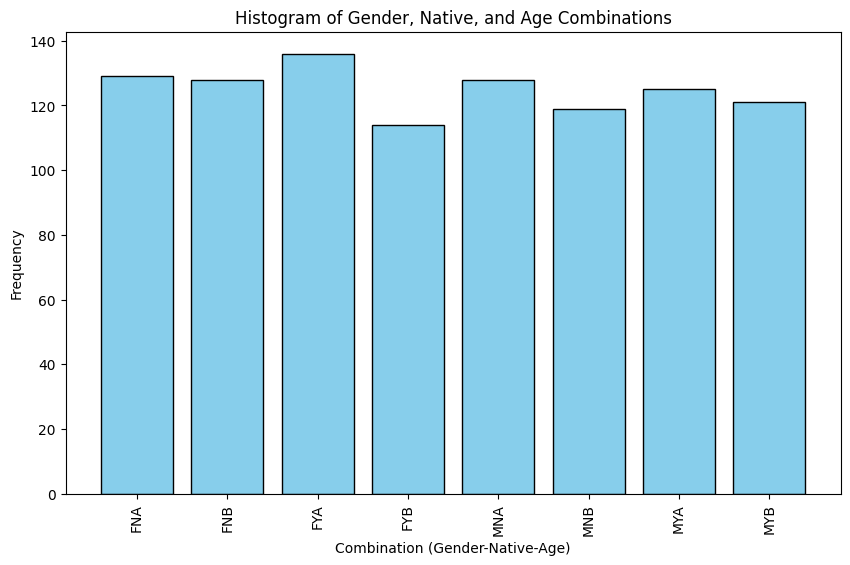

In [3]:
counts = df.groupby(['gender', 'native', 'age']).size().reset_index(name='count')

# Plotting histogram
plt.figure(figsize=(10, 6))
x_labels = [f'{g}{n}{a}' for g, n, a in counts[['gender', 'native', 'age']].values]
print(x_labels)
x = np.arange(len(x_labels))
plt.bar(x, counts['count'], color='skyblue', edgecolor='black')
print(counts['count'])
plt.xticks(x, x_labels, rotation='vertical')
plt.title('Histogram of Gender, Native, and Age Combinations')
plt.xlabel('Combination (Gender-Native-Age)')
plt.ylabel('Frequency')
plt.show()

In [4]:
df1=pd.DataFrame(([counts['count']]))
df1.columns=x_labels
df1

,FNA,FNB,FYA,FYB,MNA,MNB,MYA,MYB
count,129,128,136,114,128,119,125,121


In [5]:
# Linear query: Count the number of males (M)
query_result = np.sum(gender == 'M')
print(f"Number of males in the dataset: {query_result}")

Number of males in the dataset: 493


In [6]:
df1

,FNA,FNB,FYA,FYB,MNA,MNB,MYA,MYB
count,129,128,136,114,128,119,125,121


In [7]:
def laplace_noise(df,query,epsilon):
  new_ans=[]
  ans=[]
  c=1/epsilon
  df
  for q in query:
    column_values = getattr(df, q)
    #print(column_values)
    for value in column_values:

      ans.append(value)
    for i in q:
      #print('query value',i)
      if i=="Y":
       # print(c)
        y=np.random.laplace(scale=c)
        new_ans.append(y)
        #print(y)
      else:
        y=0
        new_ans.append(y)
    #print('laplace',new_ans)
    #print('free from laplace',ans)
  return sum(new_ans+ans),sum(ans)
#we are consider that we have to private the native column and native="Y" become a sensitive value therefore we have to private those value which contain "Y" in native attribute
query1=['MNA','MNB']
query2=['MYA',"MYB","FNA","FYA"]
Q=[query1,query2]
for q in Q:
  epsilon=0.09
  answer_with_dp,answer_without_dp=laplace_noise(df1,q,epsilon)
  print('ANSWER of ',q,' with dp:',answer_with_dp)
  print('Answer of ',q,'without dp:',answer_without_dp)
  print('_________________________________________________________')


ANSWER of  ['MNA', 'MNB']  with dp: 247
Answer of  ['MNA', 'MNB'] without dp: 247
_________________________________________________________
ANSWER of  ['MYA', 'MYB', 'FNA', 'FYA']  with dp: 497.41160688777154
Answer of  ['MYA', 'MYB', 'FNA', 'FYA'] without dp: 511
_________________________________________________________


In [8]:
import numpy as np

# Query function: Euclidean distance between two points in 2D space
def euclidean_distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2), ord=2)

# Generate dataset

dataset = np.random.uniform(low=0, high=10, size=(10, 2))  # 10 random points in 2D space


In [9]:
dataset

array([[4.81566796, 4.08672304],
       [9.63338085, 5.03866194],
       [0.26119987, 6.53118332],
       [5.39859876, 3.93225019],
       [5.57644672, 4.94366614],
       [5.12154559, 1.18841391],
       [6.37159058, 4.90824686],
       [9.94886966, 7.67371763],
       [6.87187969, 1.0289015 ],
       [7.58722516, 7.33785006]])

In [10]:
def global_sensitivity(query, datapoints):
    max_sensitivity = 0
    for i in range(len(datapoints)):

        for j in range( 1, len(datapoints)):

            x = datapoints[i]
            # print('x',x)

            x0 = datapoints[j]
            # print(i,j)
            # print('x0',x0)
            if np.linalg.norm(np.array(x) - np.array(x0), ord=2) <= 2:
                sensitivity = abs(query(x, x0))
                max_sensitivity = max(max_sensitivity, sensitivity)
    return max_sensitivity

# Compute global sensitivity
sensitivity = global_sensitivity(euclidean_distance, dataset)
print("Global Sensitivity:", sensitivity)


Global Sensitivity: 1.759487592670406


In [11]:
epsilon=0.5 #lets assume privacy budget 0.5

In [12]:
noise_query=[]
for point in dataset:
  noise=np.random.laplace(scale=sensitivity / epsilon)
  dist=euclidean_distance(point,dataset[0])+noise#adding laplace noise using defination of senstivity
  # print(noise)
  # print(dist)
  noise_query.append(dist)


In [13]:
original_query=[euclidean_distance(point, dataset[0])  for i, point in enumerate(dataset)]


In [14]:
#adding laplace noise by older method
epsilon=0.5
old_laplace_noise=[]
for i in range(len(original_query)):
  laplace=original_query[i]+np.random.laplace(1/epsilon)
  old_laplace_noise.append(laplace)
old_laplace_noise


[5.456493088258334,
 8.834723901657203,
 7.389627564954827,
 1.1231709283271845,
 2.5142636914355663,
 4.9709702409886685,
 4.0913385644219264,
 9.633192431098397,
 5.779728103098818,
 6.832584801559512]

In [15]:
noise_query

[5.049320423336225,
 8.618849885946378,
 5.108145371340381,
 -2.8503605394027307,
 0.27756334143795036,
 0.06704478021702487,
 2.2312501511639002,
 6.571083171670257,
 4.512036991883786,
 3.205322858228981]

In [16]:
#finding error between origianl query answer and noisy answer
n=len(original_query)
mean_error=0
mean_error_old_laplace=0
for i in range(len(original_query)):
  error=(original_query[i]-noise_query[i])**2
  error2=(original_query[i]-old_laplace_noise[i])**2
  mean_error+=error
  mean_error_old_laplace+=error2
mse=np.sqrt(mean_error)/len(original_query)
mse_old_lap=np.sqrt(mean_error_old_laplace)/n
print('the mean squared error is :',mse)
print(mse_old_lap)

the mean squared error is : 0.7885197714336808
0.9177050531273669


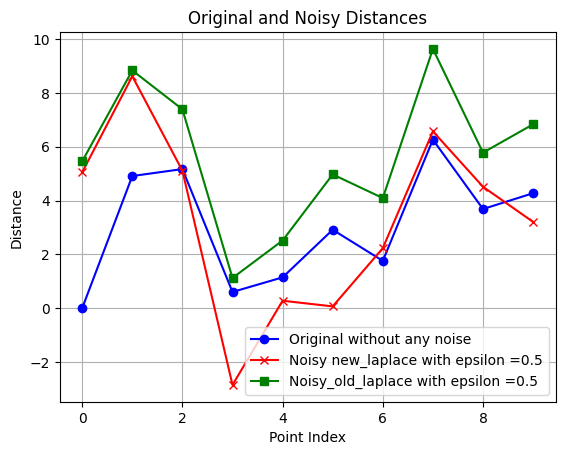

In [17]:
# Plot the original distances
plt.plot(original_query, label='Original without any noise ', color='blue', marker='o')

# Plot the first set of noisy distances
plt.plot(noise_query, label='Noisy new_laplace with epsilon =0.5', color='red', marker='x')

# Plot the second set of noisy distances
plt.plot(old_laplace_noise, label='Noisy_old_laplace with epsilon =0.5', color='green', marker='s')

# Add labels and title
plt.xlabel('Point Index')
plt.ylabel('Distance')
plt.title('Original and Noisy Distances')

# Add legend
plt.legend()
plt.grid()
# Show plot
plt.show()

In [18]:
original_query=[euclidean_distance(point, dataset[0])  for i, point in enumerate(dataset)]

#Observation:
Clearly from curve it shown that previous method of privacy is not so good as compare to new because the  adding of direct noice at very high privacy budget not leads to strong privacy whereas at same privacy budget we increase the privacy

In [19]:

#Mwem mechanism:
def distances_bw_points(data, fixed_point):
    distances = [euclidean_distance(point, fixed_point) for point in data]
    return distances

def utility_function(distances, private_distance):
    # Utility function: penalize large differences between original and perturbed distances
    return np.max(np.abs(np.array(distances) - np.array(private_distance)))

def exponential_mechanism(distances, epsilon):
    # Exponential mechanism for selecting outputs based on utility and adding Laplace noise for privacy
    utilities_sensitivity = [np.exp(-epsilon * utility) for utility in distances]
    probabilities = utilities_sensitivity / np.sum(utilities_sensitivity)
    selected_index = np.random.choice(len(distances), p=probabilities)
    return selected_index

def add_noise(distances, epsilon):
    # Add Laplace noise to distances for differential privacy
    noisy_distances = [distance + np.random.laplace(scale=1/epsilon) for distance in distances]
    return noisy_distances

def mwem(data, fixed_point, epsilon):
    # Compute distances between data points and the fixed point
    distances = distances_bw_points(data, fixed_point)
    weighted_distances=[]
    utility_scores = [utility_function(distances, [distance]) for distance in distances]

    # Exponential mechanism: select output (perturbed distances) based on utility
    for i in range(len(data)):

      selected_index = exponential_mechanism(utility_scores, epsilon)
      # print(selected_index)
      private_distance = [distances[selected_index]]

    # Add Laplace noise to perturbed distances for differential privacy
      noisy_dist = add_noise(private_distance, epsilon)
      weighted_distances.append(noisy_dist[0])

    return weighted_distances

# apply on our data set
data=dataset

fixed_point=data[0]
epsilon=0.5
# Apply MWEM to preserve Euclidean distances with the fixed point
private_distance = mwem(data, fixed_point, epsilon)


print("private distances with noise:", private_distance)
print("Original distances:", distances_bw_points(data, fixed_point))
origianl_diatances= distances_bw_points(data, fixed_point)

private distances with noise: [4.548795824803937, 3.4384655673129094, 2.0494550054972214, 7.716735672541544, 4.135407086020331, 0.31048006900632297, -1.291479905929329, 6.94281951909166, -1.8673631219250577, 2.7665100090183286]
Original distances: [0.0, 4.910859919210474, 5.169000448899845, 0.6030507200098151, 1.1459213696564687, 2.9144050745811394, 1.759487592670406, 6.262291102852621, 3.6848716741046994, 4.272160600697544]


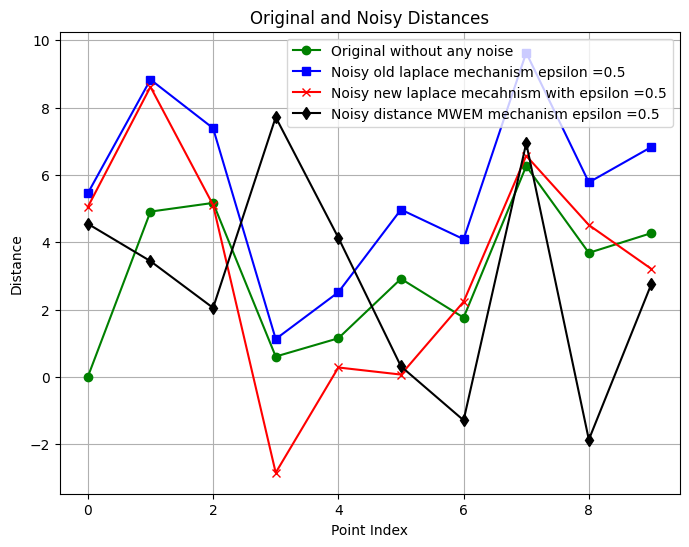

In [20]:
plt.figure(figsize=(8,6))
# plot of origianl query results
plt.plot(original_query, label='Original without any noise', color='green', marker='o')

#plot for laplace mecahnism

plt.plot(old_laplace_noise, label='Noisy old laplace mechanism epsilon =0.5', color='blue', marker='s')
plt.plot(noise_query, label='Noisy new laplace mecahnism with epsilon =0.5', color='red', marker='x')

# Plot the exponential privacy of noisy distances
plt.plot(private_distance, label='Noisy distance MWEM mechanism epsilon =0.5', color='black', marker='d')

# Add labels and title
plt.xlabel('Point Index')
plt.ylabel('Distance')
plt.title('Original and Noisy Distances')

# Add legend
plt.legend()
plt.grid()
# Show plot
plt.show()

the mean squared error is : 1.6468246911243978
0.34504301840019147
1.1907091701203685


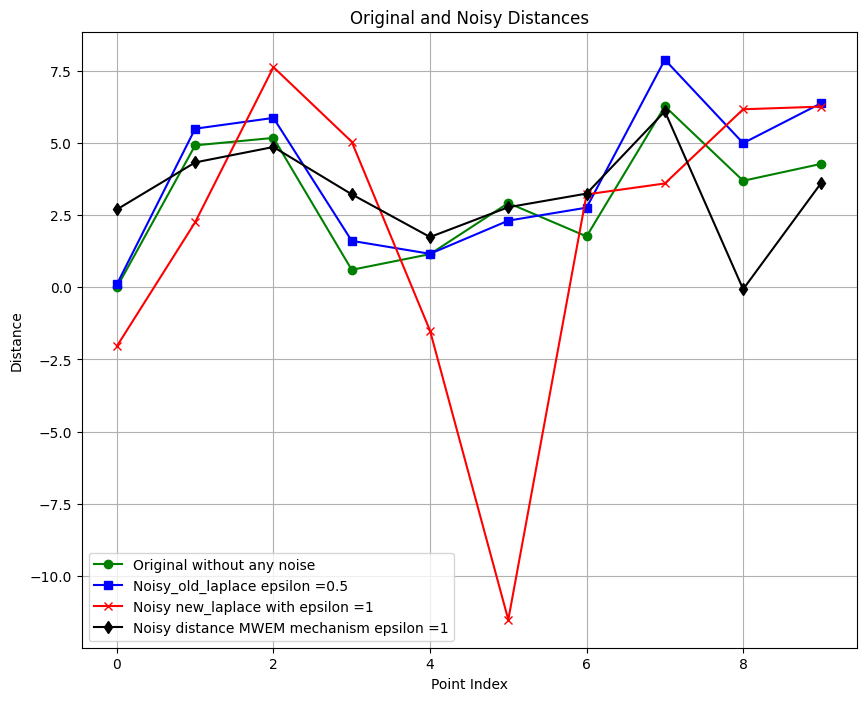

In [21]:
#adding laplace noise by older method
epsilon=1
old_laplace_noise=[]
for i in range(len(original_query)):
  laplace=original_query[i]+np.random.laplace(1/epsilon)
  old_laplace_noise.append(laplace)
old_laplace_noise
noise_query=[]
epsilon=0.5
for point in dataset:
  noise=np.random.laplace(scale=sensitivity / epsilon)
  dist=euclidean_distance(point,dataset[0])+noise#adding laplace noise using defination of senstivity
  # print(noise)
  # print(dist)
  noise_query.append(dist)
#finding error between origianl query answer and noisy answer
n=len(original_query)
mean_error=0
mean_error_old_laplace=0
mean_error_mwem=0
for i in range(len(original_query)):
  error=(original_query[i]-noise_query[i])**2
  error2=(original_query[i]-old_laplace_noise[i])**2
  error3=(original_query[i]-private_distance[i])**2
  mean_error+=error
  mean_error_old_laplace+=error2
  mean_error_mwem+=error3
mse=np.sqrt(mean_error)/len(original_query)
mse_old_lap=np.sqrt(mean_error_old_laplace)/n
mse_mwem=np.sqrt(mean_error_mwem)/n
print('the mean squared error is :',mse)
print(mse_old_lap)
print(mse_mwem)
#mwem
fixed_point=data[0]
epsilon=1
# Apply MWEM to preserve Euclidean distances with the fixed point
private_distance = mwem(data, fixed_point, epsilon)


origianl_diatances= distances_bw_points(data, fixed_point)
# Plot the original distances
plt.figure(figsize=(10,8))
plt.plot(original_query, label='Original without any noise', color='green', marker='o')



# Plot the second set of noisy distances
plt.plot(old_laplace_noise, label='Noisy_old_laplace epsilon =0.5', color='blue', marker='s')
# Plot the first set of noisy distances
plt.plot(noise_query, label='Noisy new_laplace with epsilon =1', color='red', marker='x')
# Plot the exponential privacy of noisy distances
plt.plot(private_distance, label='Noisy distance MWEM mechanism epsilon =1', color='black', marker='d')
# Add labels and title
plt.xlabel('Point Index')
plt.ylabel('Distance')
plt.title('Original and Noisy Distances')

# Add legend
plt.legend()
plt.grid()
# Show plot
plt.show()

#Observation:
In this we increase the privacy budget for 0.5 to 1 for new laplace mechanism and in MWEM ,we se that here also new mechanism is even better for high privacy budgets.

**Experiment over whole data set:**

In [22]:

# Generate dataset which is used in research paper
dataset = np.random.uniform(low=0, high=100, size=(10000, 2))

In [23]:
data=dataset

In [26]:
# def global_sensitivity(query, datapoints):
#     max_sensitivity = 0
#     for i in range(len(datapoints)):

#         for j in range( 1, len(datapoints)):

#             x = datapoints[i]
#             # print('x',x)

#             x0 = datapoints[j]
#             # print(i,j)
#             # print('x0',x0)
#             if np.linalg.norm(np.array(x) - np.array(x0), ord=2) <= 2:
#                 sensitivity = abs(query(x, x0))
#                 max_sensitivity = max(max_sensitivity, sensitivity)
#     return max_sensitivity

# # Compute global sensitivity
# sensitivity = global_sensitivity(euclidean_distance, dataset)
# print("Global Sensitivity:", sensitivity)

In [27]:

original_query=[euclidean_distance(point, dataset[0])  for i, point in enumerate(dataset)]
noise_query=[]
for point in dataset:
  noise=np.random.laplace(scale=sensitivity / epsilon)
  dist=euclidean_distance(point,dataset[0])+noise#adding laplace noise using defination of senstivity
  # print(noise)
  # print(dist)
  noise_query.append(dist)
#adding laplace noise by older method
epsilon=0.5
old_laplace_noise=[]
for i in range(len(original_query)):
  laplace=original_query[i]+np.random.laplace(1/epsilon)
  old_laplace_noise.append(laplace)


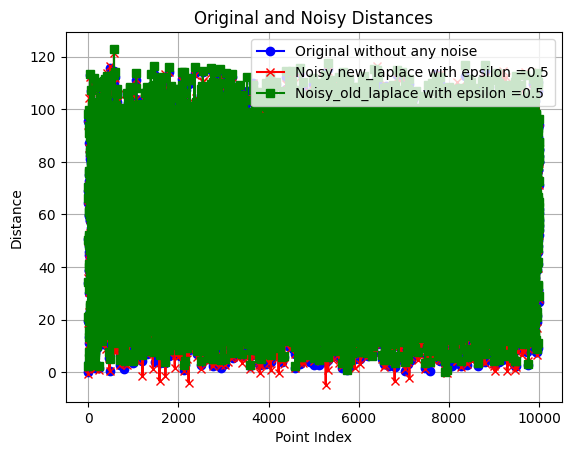

In [28]:
# Plot the original distances
plt.plot(original_query, label='Original without any noise ', color='blue', marker='o')

# Plot the first set of noisy distances
plt.plot(noise_query, label='Noisy new_laplace with epsilon =0.5', color='red', marker='x')

# Plot the second set of noisy distances
plt.plot(old_laplace_noise, label='Noisy_old_laplace with epsilon =0.5', color='green', marker='s')

# Add labels and title
plt.xlabel('Point Index')
plt.ylabel('Distance')
plt.title('Original and Noisy Distances')

# Add legend
plt.legend()
plt.grid()
# Show plot
plt.show()

In [29]:

#Mwem mechanism:
def distances_bw_points(data, fixed_point):
    distances = [euclidean_distance(point, fixed_point) for point in data]
    return distances

def utility_function(distances, private_distance):
    # Utility function: penalize large differences between original and perturbed distances
    return np.max(np.abs(np.array(distances) - np.array(private_distance)))

def exponential_mechanism(distances, epsilon):
    # Exponential mechanism for selecting outputs based on utility and adding Laplace noise for privacy
    utilities_sensitivity = [np.exp(-epsilon * utility) for utility in distances]
    probabilities = utilities_sensitivity / np.sum(utilities_sensitivity)
    selected_index = np.random.choice(len(distances), p=probabilities)
    return selected_index

def add_noise(distances, epsilon):
    # Add Laplace noise to distances for differential privacy
    noisy_distances = [distance + np.random.laplace(scale=1/epsilon) for distance in distances]
    return noisy_distances

def mwem(data, fixed_point, epsilon):
    # Compute distances between data points and the fixed point
    distances = distances_bw_points(data, fixed_point)
    weighted_distances=[]
    utility_scores = [utility_function(distances, [distance]) for distance in distances]

    # Exponential mechanism: select output (perturbed distances) based on utility
    for i in range(len(data)):

      selected_index = exponential_mechanism(utility_scores, epsilon)
      # print(selected_index)
      private_distance = [distances[selected_index]]

    # Add Laplace noise to perturbed distances for differential privacy
      noisy_dist = add_noise(private_distance, epsilon)
      weighted_distances.append(noisy_dist[0])

    return weighted_distances

# apply on our data set
data=dataset

fixed_point=data[0]
epsilon=0.5
# Apply MWEM to preserve Euclidean distances with the fixed point
private_distance = mwem(data, fixed_point, epsilon)


print("private distances with noise:", private_distance)
print("Original distances:", distances_bw_points(data, fixed_point))
origianl_diatances= distances_bw_points(data, fixed_point)

private distances with noise: [58.127159882444204, 53.77577480539084, 47.446473099754485, 62.70151092284771, 62.14924386613236, 66.5030390795285, 60.28402625355992, 62.11909131509751, 65.01055246516384, 51.6072942331152, 55.719949275982614, 62.615759493128834, 53.47991447173099, 63.08841801544738, 53.1296060553978, 60.92483346899882, 56.99744591148685, 59.99316601338972, 55.60753359593089, 56.17757278786668, 58.351981610005886, 56.076180814380734, 59.65588683043061, 58.002886000449685, 59.841031800904695, 58.0594549190013, 55.6477923552498, 60.49737928436429, 53.98294302634694, 56.51079572158621, 54.13443238940546, 58.54978668597127, 63.94094638716636, 53.00996968811248, 47.755601860823354, 59.40899545216312, 53.812008734154595, 60.6132750084351, 48.66345029920757, 58.14059236748844, 57.46625200199679, 51.54743248291759, 65.31125797273008, 59.45423566187386, 52.247304405927316, 55.64513907858813, 47.75936404933752, 58.03161958113766, 58.892891280185474, 52.83284634556316, 57.1547462679

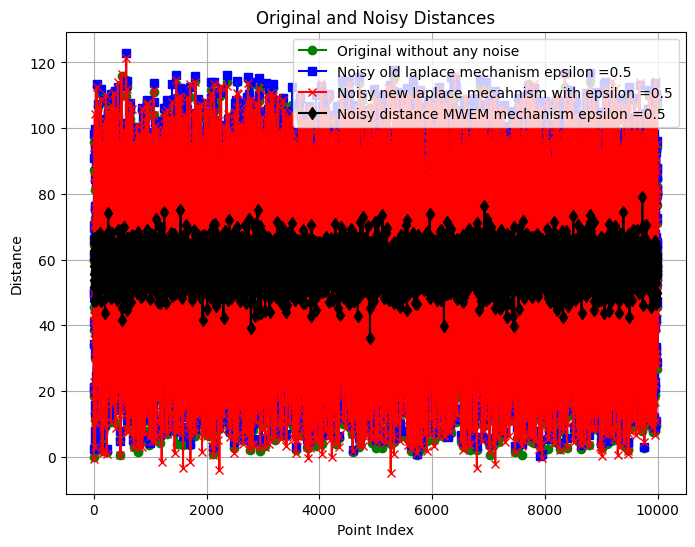

In [30]:
plt.figure(figsize=(8,6))
# plot of origianl query results
plt.plot(original_query, label='Original without any noise', color='green', marker='o')

#plot for laplace mecahnism

plt.plot(old_laplace_noise, label='Noisy old laplace mechanism epsilon =0.5', color='blue', marker='s')
plt.plot(noise_query, label='Noisy new laplace mecahnism with epsilon =0.5', color='red', marker='x')

# Plot the exponential privacy of noisy distances
plt.plot(private_distance, label='Noisy distance MWEM mechanism epsilon =0.5', color='black', marker='d')

# Add labels and title
plt.xlabel('Point Index')
plt.ylabel('Distance')
plt.title('Original and Noisy Distances')

# Add legend
plt.legend()
plt.grid()
# Show plot
plt.show()

In [32]:
data=pd.read_csv('uscities.csv')

In [33]:
data

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18908608,11080.3,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11922389,3184.7,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8497759,4614.5,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6080145,4758.9,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,5970127,1384.0,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31115,Kohatk,Kohatk,AZ,Arizona,4021,Pinal,32.5781,-112.0032,0,77.3,shape,False,False,America/Phoenix,3,85634,1840022983
31116,Ironville,Ironville,PA,Pennsylvania,42013,Blair,40.6586,-78.2155,0,59.2,shape,False,False,America/New_York,3,16686,1840152922
31117,Newkirk,Newkirk,NM,New Mexico,35019,Guadalupe,35.0635,-104.2715,0,0.0,shape,False,False,America/Denver,3,88417,1840024978
31118,Falcon Village,Falcon Village,TX,Texas,48427,Starr,26.5652,-99.1341,0,38.9,shape,False,False,America/Chicago,3,78545,1840018314


In [34]:
df=pd.DataFrame(zip(data['lat'],data['lng']))
df[0][1]

34.1141

In [42]:
print(len(df))
dataset_original=[]
for i in range(len(df)):
  lat=df[0][i]
  lng=df[1][i]
  dataset_original.append([lat,lng])
dataset=dataset_original[0:10]
len(dataset)


31120


10

In [38]:
def global_sensitivity(query, datapoints):
    max_sensitivity = 0
    for i in range(len(datapoints)):

        for j in range( 1, len(datapoints)):

            x = datapoints[i]
            # print('x',x)

            x0 = datapoints[j]
            # print(i,j)
            # print('x0',x0)
            if np.linalg.norm(np.array(x) - np.array(x0), ord=2) <= 2:
                sensitivity = abs(query(x, x0))
                max_sensitivity = max(max_sensitivity, sensitivity)
    return max_sensitivity

# Compute global sensitivity
sensitivity = global_sensitivity(euclidean_distance, dataset)
print("Global Sensitivity:", sensitivity)

Global Sensitivity: 1.3903598670847794


In [39]:

fixed_point=dataset[0]
original_query=[]
print(dataset)
for point in dataset:
  dist=euclidean_distance(point,dataset[0])
  original_query.append(dist)
original_query

[[40.6943, -73.9249], [34.1141, -118.4068], [41.8375, -87.6866], [25.784, -80.2101], [29.786, -95.3885], [32.7935, -96.7667], [40.0077, -75.1339], [33.7628, -84.422], [38.9047, -77.0163], [42.3188, -71.0852]]


[0.0,
 44.96597001789243,
 13.809101821986834,
 16.18087714340604,
 24.07648508088338,
 24.169618695378716,
 1.3903598670847794,
 12.57914149137373,
 3.57203333131146,
 3.271528135290904]

the mean squared error is : 1.6811207939417367
0.7917179305546937
5.5796632210176025


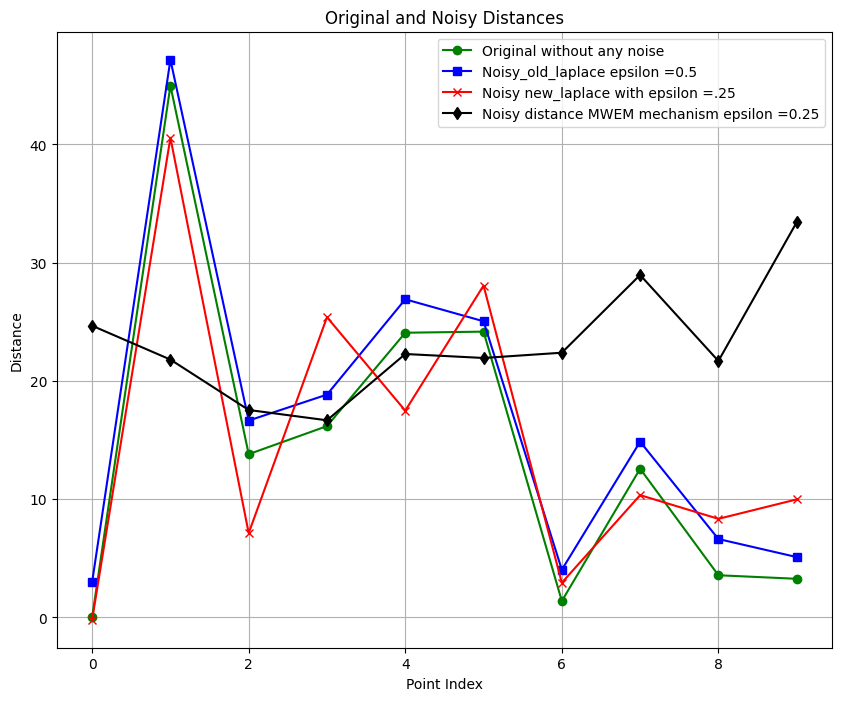

In [41]:
#mwem
fixed_point=dataset[0]
epsilon=0.35
# Apply MWEM to preserve Euclidean distances with the fixed point
private_distance = mwem(dataset, fixed_point, epsilon)


origianl_diatances= distances_bw_points(dataset, fixed_point)
#adding laplace noise by older method

old_laplace_noise=[]
for i in range(len(original_query)):
  laplace=original_query[i]+np.random.laplace(1/epsilon)
  old_laplace_noise.append(laplace)
old_laplace_noise
noise_query=[]

for point in dataset:
  noise=np.random.laplace(scale=sensitivity / epsilon)
  dist=euclidean_distance(point,dataset[0])+noise#adding laplace noise using defination of senstivity
  # print(noise)
  # print(dist)
  noise_query.append(dist)
#finding error between origianl query answer and noisy answer
n=len(original_query)
mean_error=0
mean_error_old_laplace=0
mean_error_mwem=0
for i in range(len(original_query)):
  error=(original_query[i]-noise_query[i])**2
  error2=(original_query[i]-old_laplace_noise[i])**2
  error3=(original_query[i]-private_distance[i])**2
  mean_error+=error
  mean_error_old_laplace+=error2
  mean_error_mwem+=error3
mse=np.sqrt(mean_error)/len(original_query)
mse_old_lap=np.sqrt(mean_error_old_laplace)/n
mse_mwem=np.sqrt(mean_error_mwem)/n
print('the mean squared error is :',mse)
print(mse_old_lap)
print(mse_mwem)

# Plot the original distances
plt.figure(figsize=(10,8))
plt.plot(origianl_diatances, label='Original without any noise', color='green', marker='o')
# Plot the second set of noisy distances
plt.plot(old_laplace_noise, label='Noisy_old_laplace epsilon =0.5', color='blue', marker='s')
# Plot the first set of noisy distances
plt.plot(noise_query, label='Noisy new_laplace with epsilon =.25', color='red', marker='x')
# Plot the exponential privacy of noisy distances
plt.plot(private_distance, label='Noisy distance MWEM mechanism epsilon =0.25', color='black', marker='d')
# Add labels and title
plt.xlabel('Point Index')
plt.ylabel('Distance')
plt.title('Original and Noisy Distances')

# Add legend
plt.legend()
plt.grid()
# Show plot
plt.show()


In [44]:
# def global_sensitivity(query, datapoints):
#     max_sensitivity = 0
#     for i in range(len(datapoints)):

#         for j in range( 1, len(datapoints)):

#             x = datapoints[i]
#             # print('x',x)

#             x0 = datapoints[j]
#             # print(i,j)
#             # print('x0',x0)
#             if np.linalg.norm(np.array(x) - np.array(x0), ord=2) <= 2:
#                 sensitivity = abs(query(x, x0))
#                 max_sensitivity = max(max_sensitivity, sensitivity)
#     return max_sensitivity

# # Compute global sensitivity
# sensitivity = global_sensitivity(euclidean_distance, dataset_original)
# print("Global Sensitivity:", sensitivity)

In [47]:
dataset=dataset_original[0:100]
def global_sensitivity(query, datapoints):
    max_sensitivity = 0
    for i in range(len(datapoints)):

        for j in range( 1, len(datapoints)):

            x = datapoints[i]
            # print('x',x)

            x0 = datapoints[j]
            # print(i,j)
            # print('x0',x0)
            if np.linalg.norm(np.array(x) - np.array(x0), ord=2) <= 2:
                sensitivity = abs(query(x, x0))
                max_sensitivity = max(max_sensitivity, sensitivity)
    return max_sensitivity

# Compute global sensitivity
sensitivity = global_sensitivity(euclidean_distance, dataset)
print("Global Sensitivity:", sensitivity)

Global Sensitivity: 1.9947542530346922


In [78]:

def dx_ij(lst):
  ui=lst[0][0]
  vi=lst[0][1]
  uj=lst[1][0]
  vj=lst[1][1]
  dx=np.sqrt((ui-uj)**2+(vi-vj)**2)
  return dx

def laplace_blow(dataset,T,epsilon):
  noise_query=[]
  for point in dataset:
    dx=dx_ij([dataset[0],point])
    # print(dx)
    if dx<=T:
      dx_blow=epsilon

    else :
      dx_blow=np.inf
    # print(epsilon)
    noise=np.random.laplace(scale=sensitivity / dx_blow)

    dist=euclidean_distance(point,dataset[0])+noise#adding laplace noise using defination of senstivity
    # print(dist)

    # print(dist)
    noise_query.append(dist)
  return noise_query

In [79]:
dataset=dataset_original[0:10]
# laplace_blow(dataset,2,epsilon=0.5)

In [92]:
def laplace_smooth(dataset,T,epsilon):
  noise_query=[]
  for point in dataset:
    dx=euclidean_distance(dataset[0],point)

    #print(dx)
    if dx<=T:
      dx_smooth=epsilon

    else :
      dx_smooth=(epsilon*dx)/T
    # print(epsilon)
    noise=np.random.laplace(scale=sensitivity / dx_smooth)
    dist=euclidean_distance(point,dataset[0])+noise#adding laplace noise using defination of senstivity
    # print(dist)
    # print(noise)
    # print(dist)
    noise_query.append(dist)
  return noise_query

In [93]:
dataset=dataset_original[0:10]
laplace_smooth(dataset,2,epsilon=0.5)

[-3.041009696267939,
 44.975480895511,
 13.6675288219633,
 16.26038222778658,
 24.232966778120296,
 24.33947756260614,
 12.925795793076576,
 12.062688019072974,
 3.059289735136889,
 -0.7157201131901507]